In [1]:
import pandas as pd

# Carregar a base de dados
file_path = './dataset_aluguel.csv'
df_aluguel = pd.read_csv(file_path)

# Verificar as primeiras linhas do dataset
print(df_aluguel.head())

# Verificar a estrutura do dataset
print(df_aluguel.info())

# Verificar valores únicos nas colunas categóricas
for column in df_aluguel.select_dtypes(include=['object']).columns:
    print(f"{column} valores únicos: {df_aluguel[column].unique()}")

   id  tamanho_m2  n_quartos  idade_casa  garagem  localizacao_Periferia  \
0   1  106.181018          1   36.760806        0                   True   
1   2  192.607146          4   10.453581        1                   True   
2   3  159.799091          5   27.072399        1                   True   
3   4  139.798773          4   34.789220        1                  False   
4   5   73.402796          5   11.427501        0                  False   

   localizacao_Subúrbio  valor_aluguel  
0                 False    1767.122088  
1                 False    3278.742397  
2                 False    2953.899737  
3                  True    2514.717108  
4                  True    1942.164396  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-nu

   tamanho_m2  n_quartos  idade_casa  garagem  localizacao_Periferia  \
0  106.181018          1   36.760806        0                   True   
1  192.607146          4   10.453581        1                   True   
2  159.799091          5   27.072399        1                   True   
3  139.798773          4   34.789220        1                  False   
4   73.402796          5   11.427501        0                  False   

   localizacao_Subúrbio  valor_aluguel  
0                 False    1767.122088  
1                 False    3278.742397  
2                 False    2953.899737  
3                  True    2514.717108  
4                  True    1942.164396  
localizacao_Periferia    2
localizacao_Subúrbio     2
dtype: int64
tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64
       tamanho_m2   n_quartos  idade_casa     garage

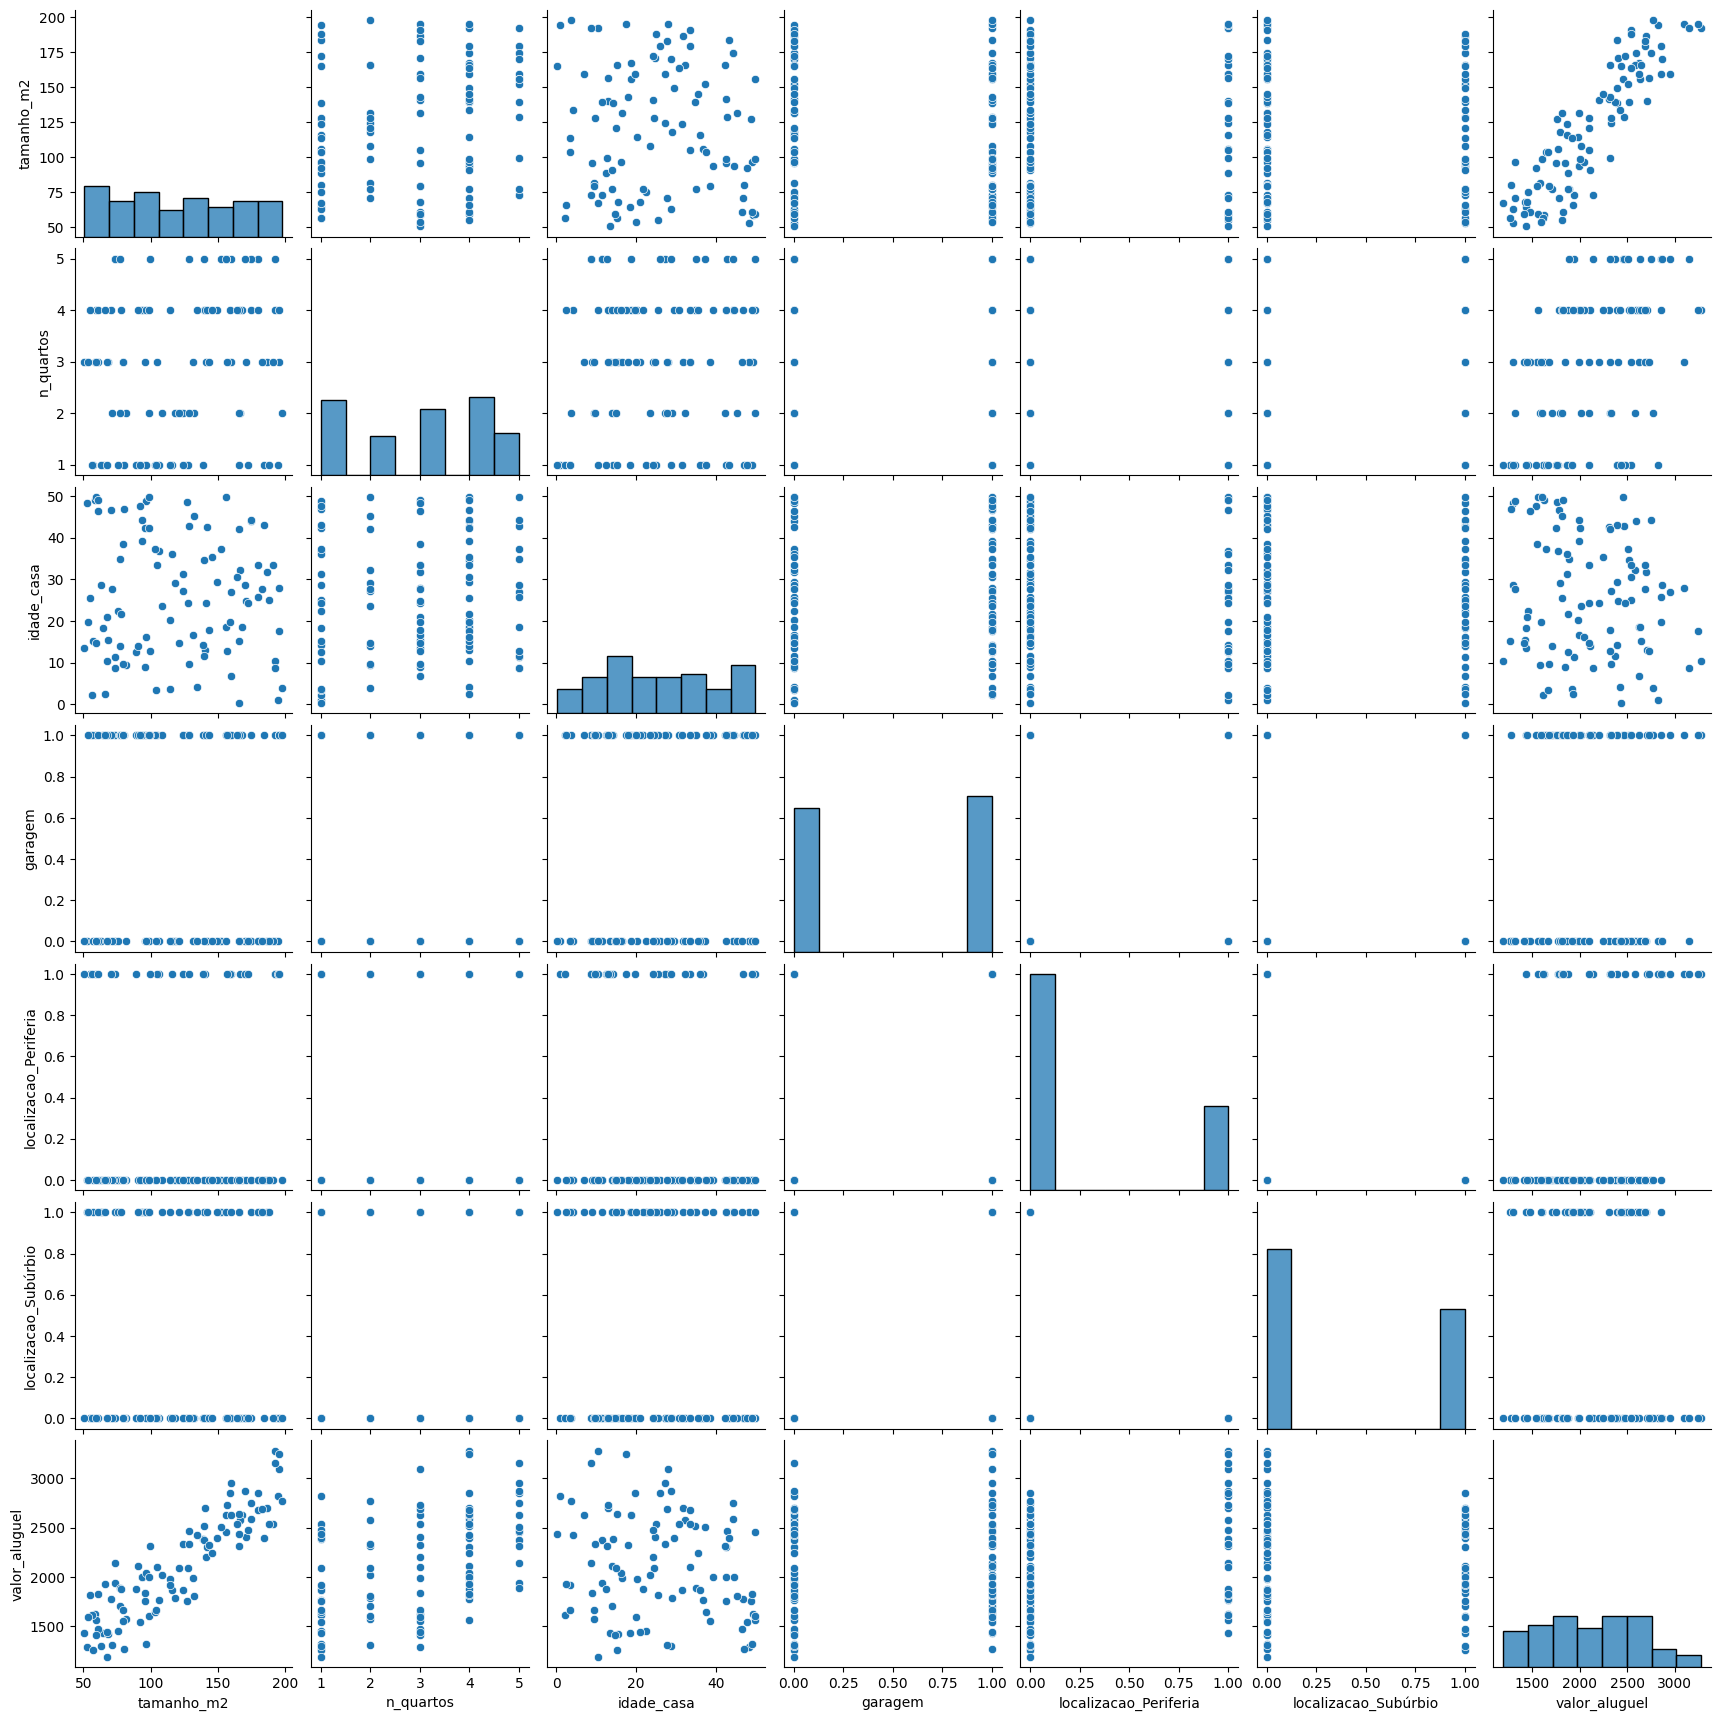

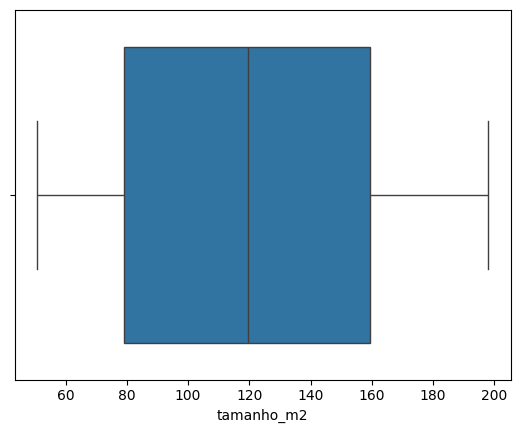

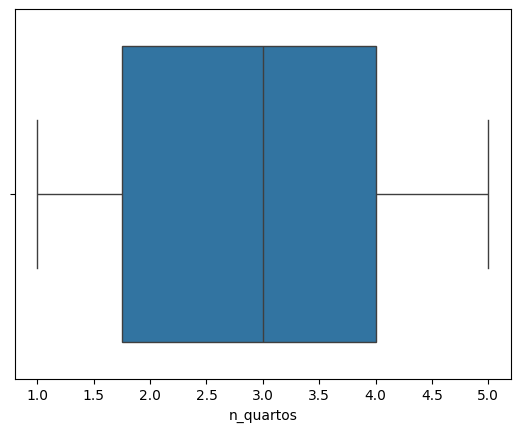

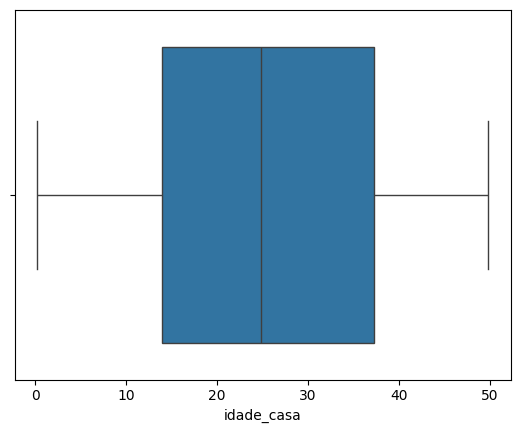

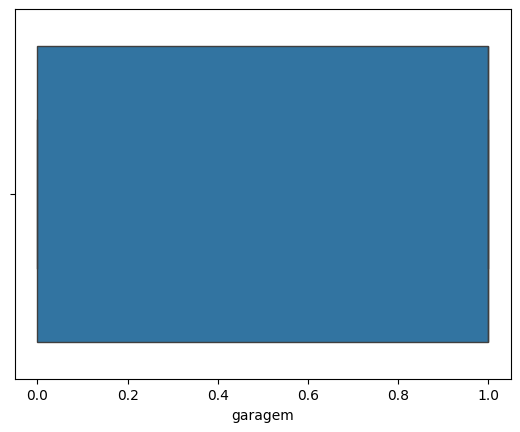

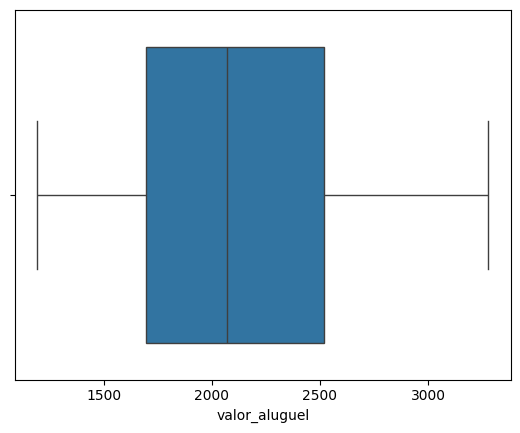

R²: 0.9322029683692089
MAE: 93.70235270972051
RMSE: 114.47558148024322


/home/offelipe/.local/share/virtualenvs/regressao-linear-multipla-f1t5iCfP/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


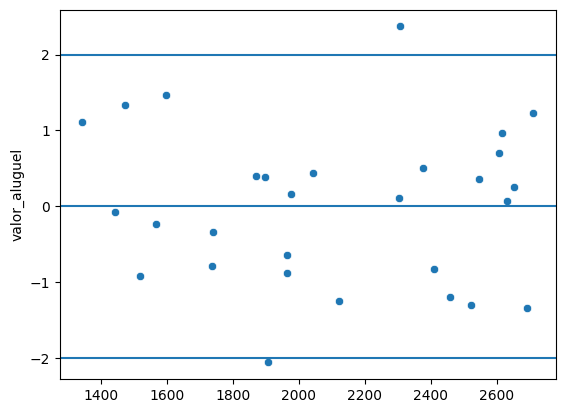

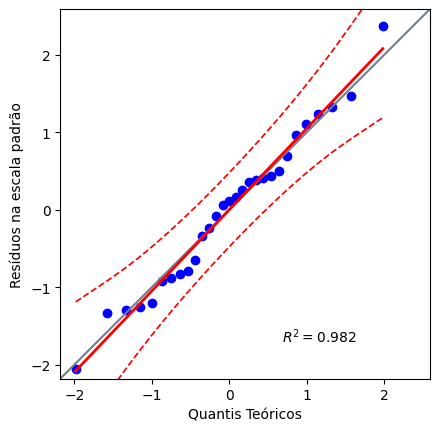

Estatística do Teste Shapiro-Wilk: 0.9832211151050111 e P-Value: 0.9113572494759457
Estatística do Teste KS: 0.5517241379310324 e P-Value: 8.003447647095403e-09
Estatística do Teste Lilliefors: 0.08986554820919257 e P-Value: 0.7867761996042536
Estatística do Teste Anderson-Darling: 0.2310963389927032 e Valor Crítico: 0.71
Estatística do Teste Goldfeld-Quandt: 1.8271955940254385 e P-Value: 0.16852042487324126


['./modelo_aluguel.pkl']

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import zscore
import pingouin as pg
import joblib

# Remover a coluna 'id'
df_aluguel.drop(columns=['id'], axis=1, inplace=True)

# Visualizar as primeiras linhas dos dados
print(df_aluguel.head())

# Analisar valores únicos das colunas categóricas
print(df_aluguel.select_dtypes(include=['bool']).nunique())

# Verificar valores nulos
print(df_aluguel.isna().sum())

# Estatísticas descritivas
print(df_aluguel.describe())

# Visualização das variáveis
sns.pairplot(df_aluguel)
plt.show()

# Tratar outliers
sns.boxplot(data=df_aluguel, x='tamanho_m2')
plt.show()
sns.boxplot(data=df_aluguel, x='n_quartos')
plt.show()
sns.boxplot(data=df_aluguel, x='idade_casa')
plt.show()
sns.boxplot(data=df_aluguel, x='garagem')
plt.show()
sns.boxplot(data=df_aluguel, x='valor_aluguel')
plt.show()

# Remover outliers baseados na variável 'valor_aluguel' (exemplo)
df_aluguel = df_aluguel[df_aluguel['valor_aluguel'] < df_aluguel['valor_aluguel'].quantile(0.95)]

# Codificar variáveis categóricas
df_aluguel = pd.get_dummies(df_aluguel, columns=['localizacao_Periferia', 'localizacao_Subúrbio'], dtype='int64')

# Separar em conjuntos de treino e teste
X = df_aluguel.drop(columns='valor_aluguel', axis=1)
y = df_aluguel['valor_aluguel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

# Definir colunas numéricas
colunas_numericas = ['tamanho_m2', 'n_quartos', 'idade_casa', 'garagem']

# Criar pipeline de pré-processamento e modelo
transformer_numericas = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

model_regr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression()),
    ]
)

# Treinar o modelo
model_regr.fit(X_train, y_train)

# Previsões e avaliação do modelo
y_pred = model_regr.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Análise dos resíduos
residuos = y_test - y_pred
residuos_std = zscore(residuos)
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)
plt.show()

# Testes de normalidade e heterocedasticidade nos resíduos
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatística do Teste Shapiro-Wilk: {stat_shapiro} e P-Value: {p_value_shapiro}")

stat_KS, p_value_KS = kstest(residuos, 'norm')
print(f"Estatística do Teste KS: {stat_KS} e P-Value: {p_value_KS}")

stat_ll, p_value_ll = lilliefors(residuos, 'norm', pvalmethod='table')
print(f"Estatística do Teste Lilliefors: {stat_ll} e P-Value: {p_value_ll}")

stat_and, critical_and, significance_and = anderson(residuos, 'norm')
print(f"Estatística do Teste Anderson-Darling: {stat_and} e Valor Crítico: {critical_and[2]}")

X_test_transformed = preprocessor.transform(X_test)
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print(f"Estatística do Teste Goldfeld-Quandt: {stat_goldfeld} e P-Value: {p_value_goldfeld}")

# Salvando o modelo
joblib.dump(model_regr, './modelo_aluguel.pkl')
